In [2]:
%matplotlib inline

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import seaborn as sns
import pandas as pd

import json

In [23]:
root_path = '/opt/ml/input/data/medical/img/full'
anno_root = '/opt/ml/input/data/medical/ufo/train_campers.json'

In [24]:
bboxes = []

with open(anno_root, 'r') as f:
    train_json = json.load(f)
    images = train_json['images']
    images_df = pd.DataFrame.from_dict(images)

image_id = list(images_df)

fnames = [os.path.join(root_path, i) for i in image_id] # 이미지 정렬 순서 고려하기 위해, json 파일에서 image path 가져오기 

for index, img_id in enumerate(image_id):
    temp_anns = []

    temp = images_df[f'{img_id}']
    words = temp.loc['words']

    for key in words.keys():
        temp_ann = {}
        temp_ann['image_id'] = img_id 
        temp_ann['id'] = index

        word = words[key]

        # if word['illegibility']: # 제외 영역
        #     temp_ann['category_id'] = 2

        
        # # category id
        # if word['language'] is not None: 
        #     if 'ko' in word['language'] and 'en' in word['language']: # ['ko', 'en']
        #         temp_ann['category_id'] = 4
        #     elif 'ko' in word['language']: # ['ko']
        #         temp_ann['category_id'] = 0
        #     elif 'en' in word['language']: # ['en']
        #         temp_ann['category_id'] = 1
        #     elif 'others' in word['language']: # ['others']
        #         temp_ann['category_id'] = 3
        #     else: # [] # number
        #         temp_ann['category_id'] = 5 



        temp_ann['bbox'] = word['points']
        temp_anns.append(temp_ann)
    bboxes.append(temp_anns)

In [25]:
img_name_list = [img.split("/")[-1][:-4] for img in fnames]

def showimg(idx):
    fig, ax = plt.subplots(1, 2, dpi=256)
    img = io.imread(fnames[idx])

    anns = bboxes[idx]

    ax[0].imshow(img)
    ax[1].imshow(img)

    for ann in anns:
        ann_id = ann['id']
        #class_idx = ann['category_id']
        
        ax[0].set_title('original', fontsize = 7)
        ax[1].set_title(f"{img_name_list[idx]}", fontsize = 7)
        
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        
        for pos in ['right', 'top', 'bottom', 'left']:
            ax[0].spines[pos].set_visible(False)
            ax[1].spines[pos].set_visible(False)
            
        points = np.array(ann['bbox'])
        
        ax[1].add_patch(patches.Polygon(
            points,
            closed = True,
            edgecolor = 'orange',
            fill = False,
            linewidth = 0.3
        ))

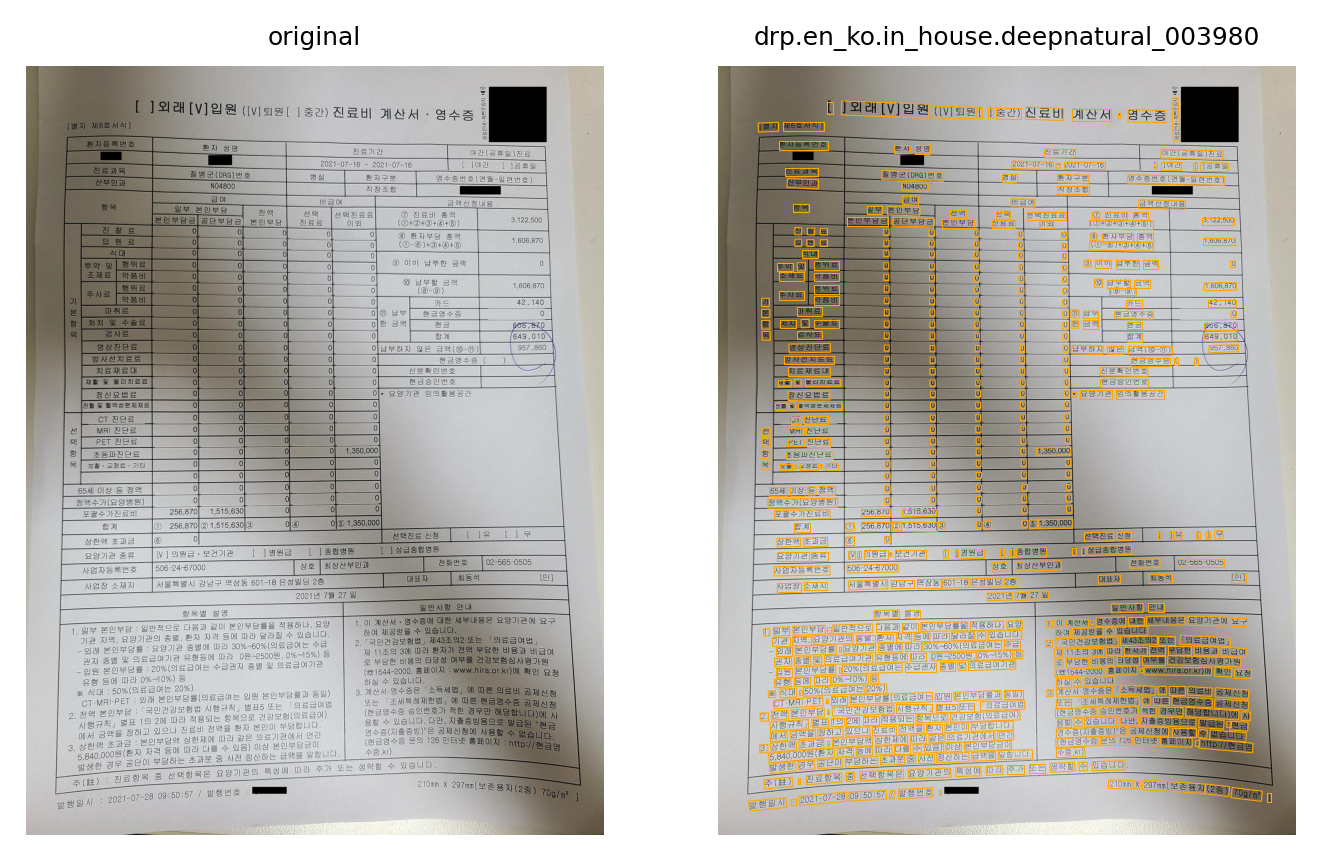

In [26]:
showimg(300) # 인덱스 1부터 ~ 진행하시면 됩니다